# **Use YOLOv10: Object Detection**

### **Check existing GPUs and Memory**

Faster GPUs

In [1]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
    print('Not connected to a GPU')
else:
    print(gpu_info)

Fri Jun 28 17:31:22 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

More memory

In [2]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
    print('Not using a high-RAM runtime')
else:
    print('You are using a high-RAM runtime!')

Your runtime has 13.6 gigabytes of available RAM

Not using a high-RAM runtime


## **1. Install YOLOv10**

In [3]:
!pip install -q git+https://github.com/THU-MIG/yolov10.git

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 59.9 MB/s eta 0:00:00


In [4]:
!pip install -q supervision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.0/124.0 kB 2.5 MB/s eta 0:00:00


## **2. Download pre-trained weights**

Get a home directory

In [5]:
import os
HOME = os.getcwd()
print(HOME)

/content


Download the weights

In [6]:
!mkdir -p {HOME}/yolov10_weights
!wget -P {HOME}/yolov10_weights -q https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10n.pt
!ls -lh {HOME}/yolov10_weights

total 11M
-rw-r--r-- 1 root root 11M May 23 09:38 yolov10n.pt


## **3. Run prediction with an image**

In [7]:
%cd {HOME}

/content


Show the image

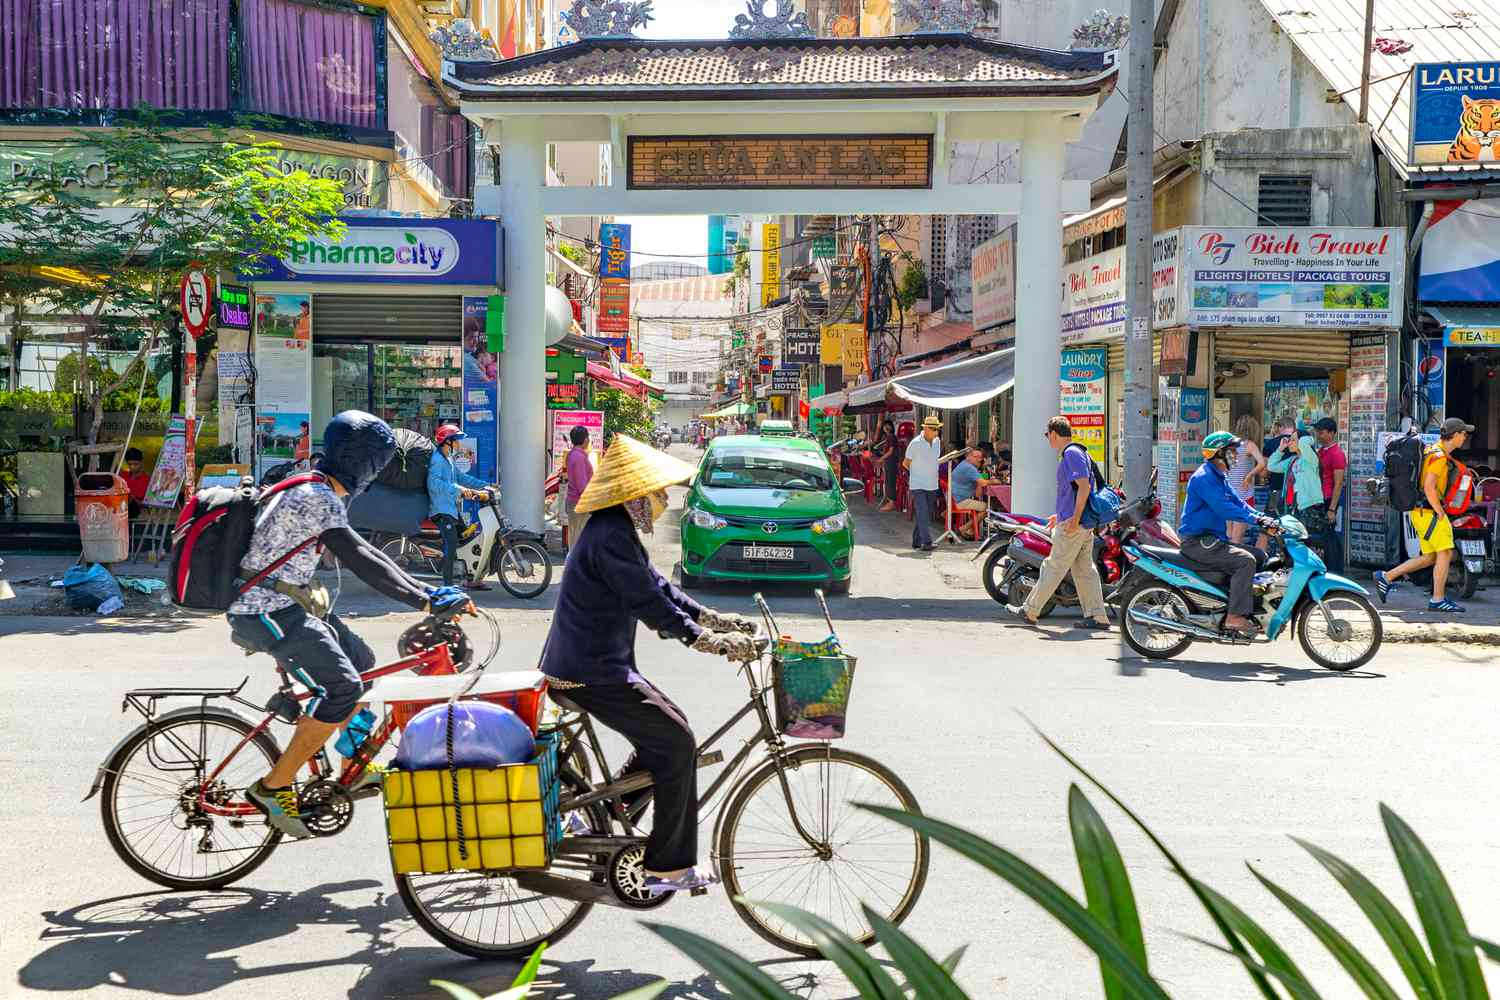

In [9]:
from IPython.display import Image
Image(filename=f'{HOME}/HCM-street.jpg', height=600)

Prediction


0: 448x640 8 0s, 2 1s, 1 2, 2 3s, 1 24, 101.8ms
Speed: 16.1ms preprocess, 101.8ms inference, 355.2ms postprocess per image at shape (1, 3, 448, 640)


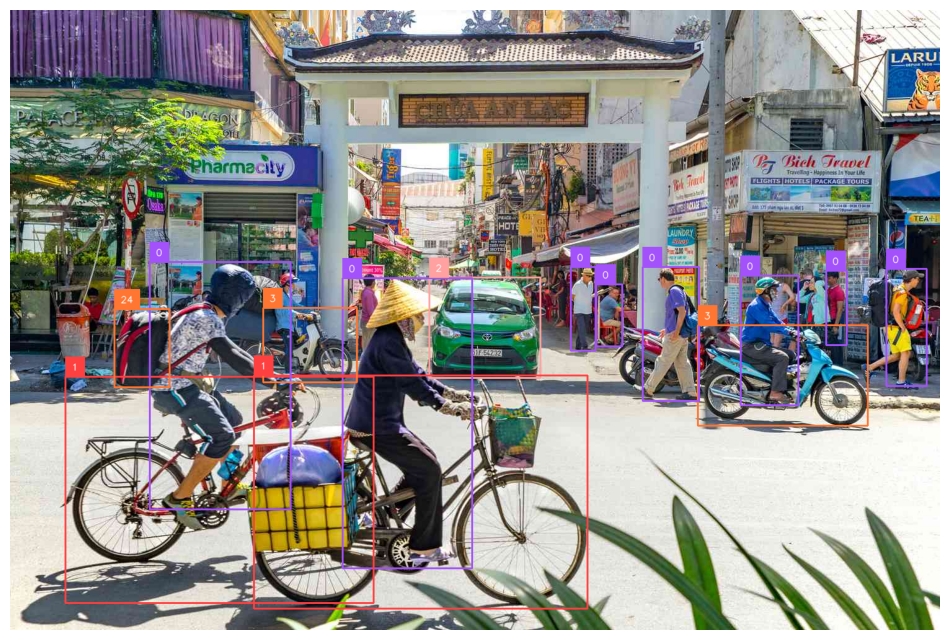

In [10]:
import cv2
import supervision as sv
from ultralytics import YOLOv10

model = YOLOv10(f'{HOME}/yolov10_weights/yolov10n.pt')
image = cv2.imread(f'{HOME}/HCM-street.jpg')
results = model(image)[0]

detections = sv.Detections.from_ultralytics(results)
bounding_box_annotator = sv.BoundingBoxAnnotator()
label_annotator = sv.LabelAnnotator()

annotated_image = bounding_box_annotator.annotate(scene=image, detections=detections)
annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections)

sv.plot_image(annotated_image)

In [ ]:
new_image_url = results.save(f"{HOME}/HCM-street-predict.jpg")

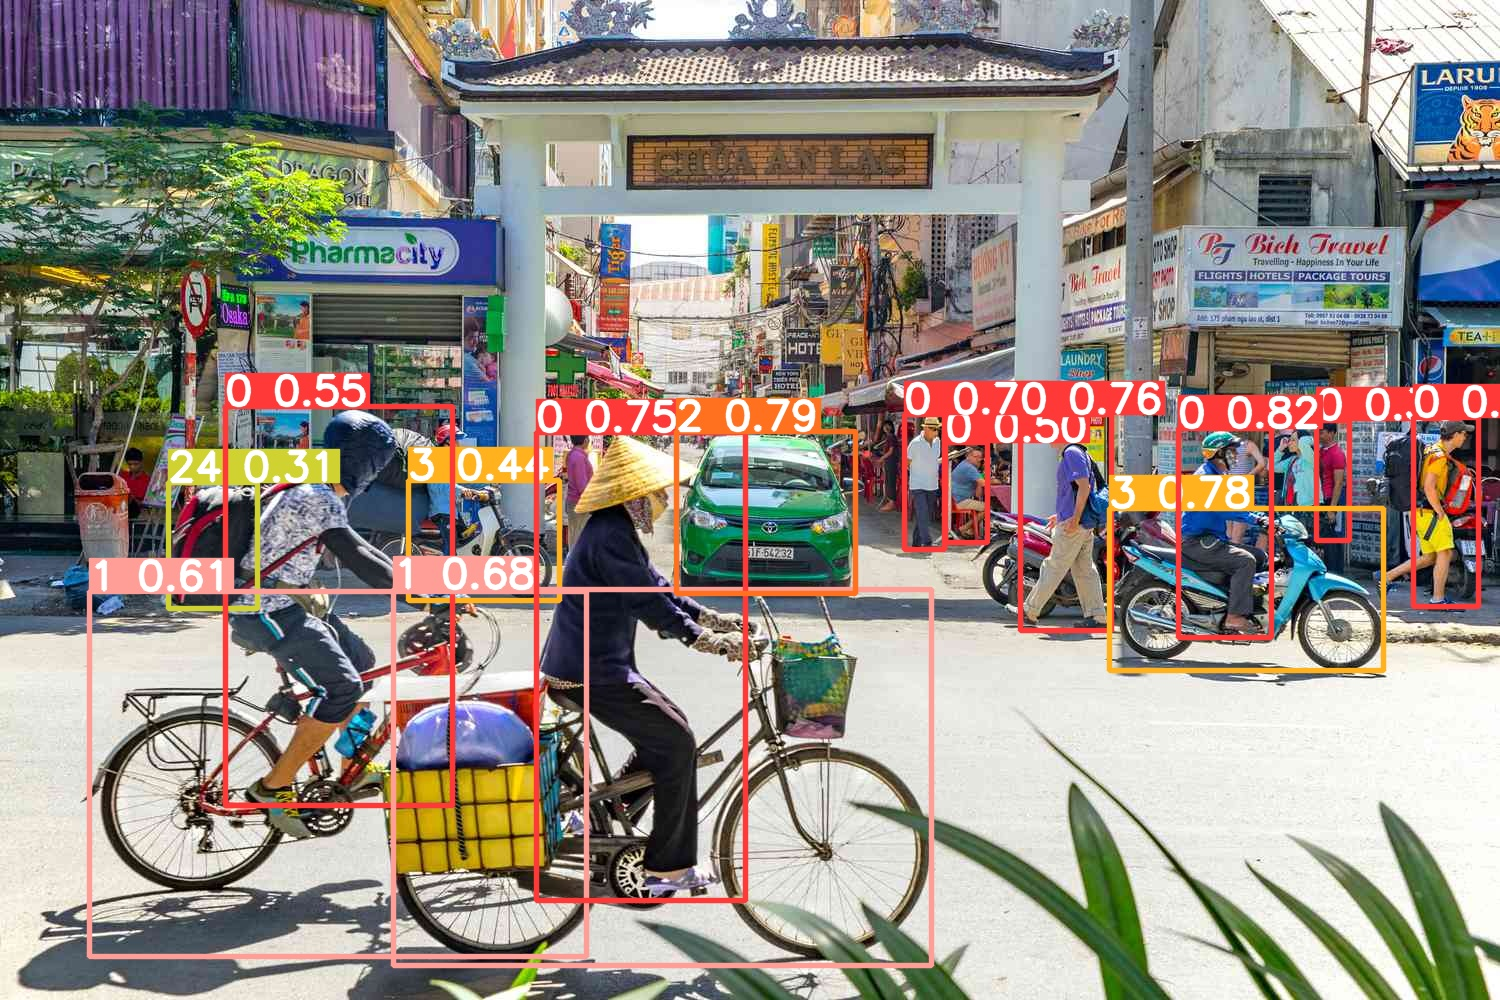

In [ ]:
Image(filename=new_image_url, height=600)